In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


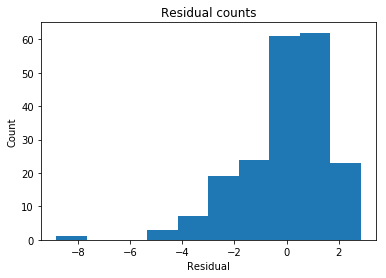

In [3]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [10]:
regr.predict(X)

array([[ 20.52397441],
       [ 12.33785482],
       [ 12.30767078],
       [ 17.59782951],
       [ 13.18867186],
       [ 12.47834763],
       [ 11.72975995],
       [ 12.12295317],
       [  3.72734086],
       [ 12.55084872],
       [  7.0322992 ],
       [ 17.28512918],
       [ 10.57712073],
       [  8.82630048],
       [ 18.43436638],
       [ 20.81929952],
       [ 12.82365674],
       [ 23.22495716],
       [  9.95168206],
       [ 14.16607293],
       [ 18.10076728],
       [ 14.7405382 ],
       [  6.4891503 ],
       [ 16.5459329 ],
       [  8.14651887],
       [ 15.6100386 ],
       [ 14.98951429],
       [ 17.05167344],
       [ 19.41053803],
       [  9.14402389],
       [ 21.6339338 ],
       [ 11.3460929 ],
       [  7.63888314],
       [ 18.86426829],
       [  7.57483051],
       [ 17.00682618],
       [ 23.40590052],
       [ 15.62347779],
       [  9.90868103],
       [ 20.44761039],
       [ 16.37766467],
       [ 17.2959832 ],
       [ 21.59580326],
       [ 13

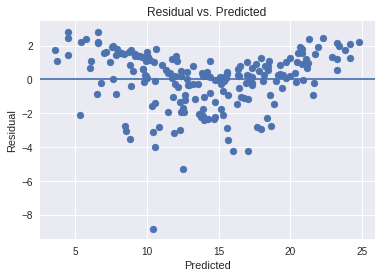

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

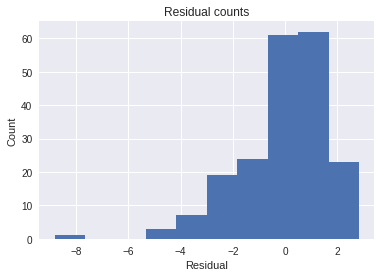

In [18]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [21]:
residual[residual < -6]

130   -8.828
Name: Sales, dtype: float64

In [22]:
X.iloc[130,]

TV           0.700
Radio       39.600
Newspaper    8.700
Name: 130, dtype: float64

In [23]:
regr.predict([0.700, 39.600, 8.700])

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 10.4276871]])

In [24]:
actual.iloc[130,]

1.6000000000000001

In [25]:
data['sum_ad'] = data['TV'] + data['Radio'] + data['Newspaper']

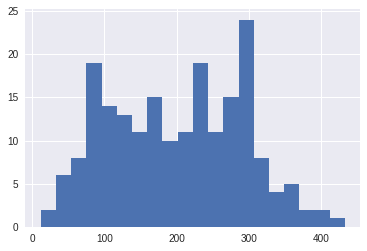

In [28]:
data['sum_ad'].hist(bins=20)

In [31]:
import math

In [32]:
data['log_Sales'] = data['Sales'].apply(lambda x: math.log(x))

In [34]:
# Instantiate and fit our model.
regr_log = linear_model.LinearRegression()
Y_log = data['log_Sales'].values.reshape(-1, 1)
X_log = data[['TV','Radio','Newspaper']]
regr_log.fit(X_log, Y_log)

# Inspect the results.
print('\nCoefficients: \n', regr_log.coef_)
print('\nIntercept: \n', regr_log.intercept_)
print('\nR-squared:')
print(regr_log.score(X_log, Y_log))


Coefficients: 
 [[ 0.0036697   0.01180192  0.00035437]]

Intercept: 
 [ 1.73900201]

R-squared:
0.799764371945


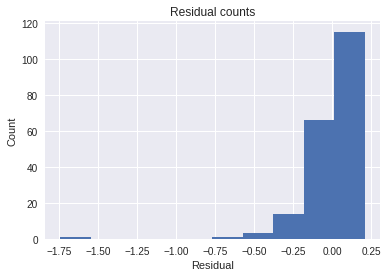

In [35]:
# Extract predicted values.
predicted_log = regr_log.predict(X_log).ravel()
actual_log = data['log_Sales']

# Calculate the error, also called the residual.
residual_log = actual_log - predicted_log

# This looks a bit concerning.
plt.hist(residual_log)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [10]:
data['sqrt_TV'] = data['TV'] ** 0.5

In [ ]:
data['log_Sales'] = ...

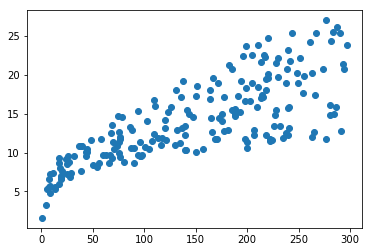

In [11]:
plt.scatter(data['TV'], data['Sales'])

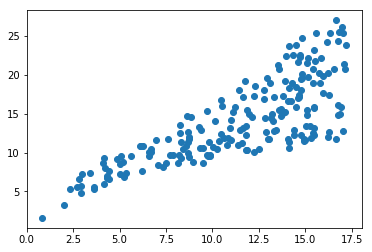

In [12]:
plt.scatter(data['sqrt_TV'], data['Sales'])

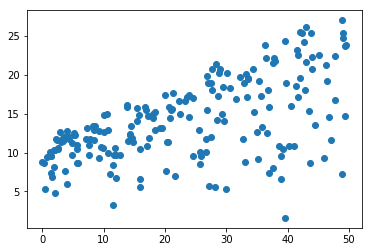

In [13]:
plt.scatter(data['Radio'], data['Sales'])

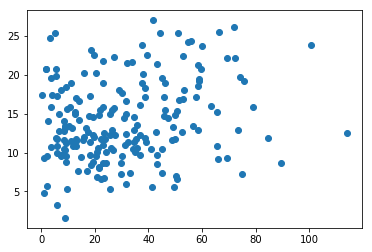

In [14]:
plt.scatter(data['Newspaper'], data['Sales'])

In [20]:
# Instantiate and fit our model.
regr_sqrt = linear_model.LinearRegression()
Y_sqrt = data['Sales'].values.reshape(-1, 1)
X_sqrt = data[['sqrt_TV','Radio','Newspaper']]
regr_sqrt.fit(X_sqrt, Y_sqrt)

# Inspect the results.
print('\nCoefficients: \n', regr_sqrt.coef_)
print('\nIntercept: \n', regr_sqrt.intercept_)
print('\nR-squared:')
print(regr_sqrt.score(X_sqrt, Y_sqrt))

# Extract predicted values.
predicted_sqrt = regr_sqrt.predict(X_sqrt).ravel()
actual_sqrt = data['log_Sales']

# Calculate the error, also called the residual.
residual_sqrt = actual_sqrt - predicted_sqrt

# This looks a bit concerning.
plt.hist(residual_sqrt)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


Coefficients: 
 [[  9.74947557e-01   1.94767873e-01  -5.25277959e-04]]

Intercept: 
 [-1.60927984]

R-squared:
0.928954905381


KeyError: 'log_Sales'

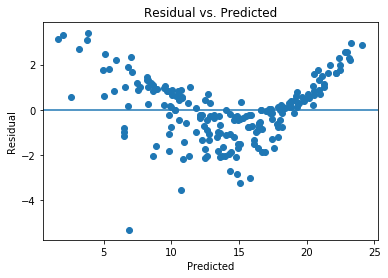

In [19]:
plt.scatter(predicted_sqrt, residual_sqrt)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [ ]:
# TODO scale features, try to improve increasing residuals with larger values

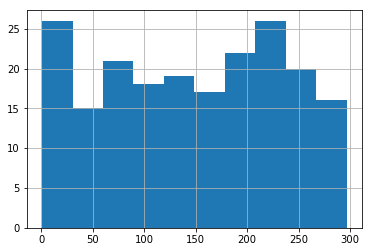

In [16]:
data['TV'].hist()

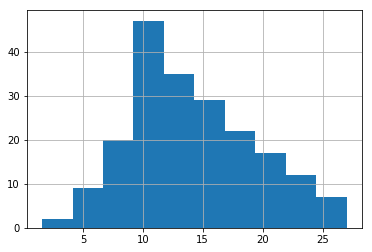

In [5]:
data['Sales'].hist()

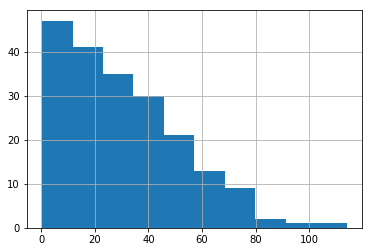

In [7]:
data['Newspaper'].hist()

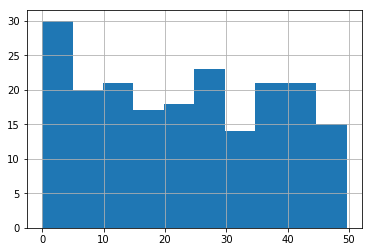

In [8]:
data['Radio'].hist()

In [17]:
# Instantiate and fit our model.
regr_sqrt = linear_model.LinearRegression()
Y_sqrt = data['Sales'].values.reshape(-1, 1)
X_sqrt = data[['sqrt_TV','Radio']]
regr_sqrt.fit(X_sqrt, Y_sqrt)

# Inspect the results.
print('\nCoefficients: \n', regr_sqrt.coef_)
print('\nIntercept: \n', regr_sqrt.intercept_)
print('\nR-squared:')
print(regr_sqrt.score(X_sqrt, Y_sqrt))

# Extract predicted values.
predicted_sqrt = regr_sqrt.predict(X_sqrt).ravel()
actual_sqrt = data['Sales']

# Calculate the error, also called the residual.
residual_sqrt = actual_sqrt - predicted_sqrt

# This looks a bit concerning.
plt.hist(residual_sqrt)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


Coefficients: 
 [[ 0.97485384  0.1944958 ]]

Intercept: 
 [-1.617931]

R-squared:
0.928950706187


KeyError: 'log_Sales'